# Funciones de distribución de probabilidades
## Distribución Uniforme

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
a = 1
b = 100
n = 10000
data = np.random.uniform(a, b, n)

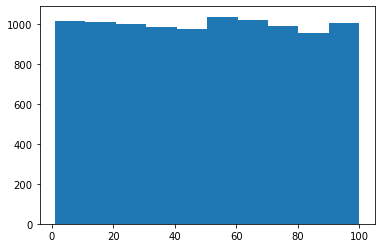

In [24]:
#Utilizamos matplotlib para pintar un histograma
%matplotlib inline
plot = plt.hist(data)

# Distribución de Gauss

In [25]:
data = np.random.randn(100)

In [26]:
plt.plot()

array([ 1.26524503,  0.17751826, -0.88856317, -1.37069495, -1.22605389,
        0.93126798, -0.3474313 , -0.36463092, -1.45735975,  0.85843449,
        0.8841973 ,  1.0414696 , -0.52229611, -0.44817506, -0.25389873,
       -0.48286996, -0.9596484 , -0.07383063,  0.10332425, -0.79331397,
        1.49102815, -1.50763259, -1.04577695, -0.03646363,  0.1942921 ,
        1.26909176, -0.31460906,  1.54716815, -0.28277021, -2.05543376,
       -0.54180284,  0.1368324 ,  1.42526865, -0.66077597, -0.09786603,
        0.92000909, -0.77659103,  0.42565425,  1.23899218, -0.86540289,
        0.6531337 , -1.88380324, -0.69967256,  0.36693948, -1.87954174,
       -0.39975528, -1.01391164,  2.1235558 , -0.43613153, -0.22191792,
        1.04994678, -0.2038683 , -1.62754854, -0.11030007,  0.87974036,
        1.13797853,  0.75055516, -0.47532662,  0.69980821,  0.9699524 ,
        2.56189952,  0.3729883 , -1.2164561 , -1.38426836, -0.25250143,
        0.85317947, -0.87459434,  0.57319336, -1.9766732 ,  0.17